In [1296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

In [1298]:
df0 = pd.read_excel("data/Absenteeism_at_work_Project.xls")

In [1299]:
df = df0.copy()

In [1302]:
df0.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Children                           float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [1303]:
pd.options.display.max_columns = None
pd.set_option("display.float_format", "{:.2f}".format)
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Children,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.00,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,4.00
1,36,0.00,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,97.00,1.00,1.00,1.00,1.00,0.00,0.00,98.00,178.00,31.00,0.00
2,3,23.00,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,97.00,0.00,1.00,0.00,1.00,0.00,0.00,89.00,170.00,31.00,2.00
3,7,7.00,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,97.00,0.00,1.00,2.00,1.00,1.00,0.00,68.00,168.00,24.00,4.00
4,11,23.00,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,97.00,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,2.00


#### The column names has spaces in it. Lets convert them without spaces. Also convert column name Work_load_Average/day consistant to others.

In [1305]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.rename(columns={"Work_load_Average/day": "Work_load_Average_per_day"}, inplace=True)
df.dtypes

ID                                   int64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day          float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Children                           float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

#### Lets analyse the null values in data set

In [1308]:
df.isna().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average_per_day          10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Children                            6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64

#### There are not many null values in dataset. We can drop those rows

In [1310]:
df.dropna(inplace=True)
df.isna().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average_per_day          0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Children                           0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

In [1311]:
df.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Hit_target,Disciplinary_failure,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00,639.00
mean,17.73,19.20,6.16,3.89,2.52,221.09,29.67,12.73,36.69,270782.13,94.74,0.05,1.31,1.02,0.57,0.07,0.74,79.31,172.14,26.77,7.02
std,11.04,8.49,3.34,1.43,1.09,64.97,14.70,4.36,6.57,39049.26,3.78,0.22,0.69,1.08,0.49,0.26,1.32,12.95,6.05,4.34,13.81
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,205917.00,81.00,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,8.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,244387.00,93.00,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,264249.00,95.00,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,27.00,9.00,5.00,3.00,260.00,50.00,16.00,40.00,284853.00,98.00,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,378884.00,100.00,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00



#### lets find the groups each column

In [1313]:

for col in df.columns:
    # Unique give number of unique values in each feature
    print()
    unique_count = df[col].nunique()
    print(f"{col} has unique {df[col].nunique()} values")
    if unique_count < 10:
        vcs = df[col].value_counts()
        print(vcs)
            


ID has unique 36 values

Reason_for_absence has unique 27 values

Month_of_absence has unique 13 values

Day_of_the_week has unique 5 values
Day_of_the_week
2    147
3    131
4    131
6    123
5    107
Name: count, dtype: int64

Seasons has unique 4 values
Seasons
3    178
2    164
4    150
1    147
Name: count, dtype: int64

Transportation_expense has unique 24 values

Distance_from_Residence_to_Work has unique 25 values

Service_time has unique 18 values

Age has unique 22 values

Work_load_Average_per_day has unique 38 values

Hit_target has unique 13 values

Disciplinary_failure has unique 2 values
Disciplinary_failure
0.00    608
1.00     31
Name: count, dtype: int64

Education has unique 4 values
Education
1.00    522
3.00     71
2.00     42
4.00      4
Name: count, dtype: int64

Children has unique 5 values
Children
0.00    254
1.00    197
2.00    144
4.00     33
3.00     11
Name: count, dtype: int64

Social_drinker has unique 2 values
Social_drinker
1.00    367
0.00    272
Nam

#### Disciplinary_failure, Social_drinker, Social_smoker are binary yes/no values
#### ID has 30 values, which means 30 people participated in this surveySeason has 4, which represents 4 seasons Spring, summer, fall, winter

In [1322]:
def count_plot(dataset,col, title, w=6, pallet='deep'):
    h = 5
    plt.figure(figsize=(w,h))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index, palette=sns.color_palette(pallet))
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(title);
    
def bar_plot(col, title, w=10, pallet='deep'):
    h = 5
    plt.figure(figsize=(w,h))
    sns.barplot(data=df, x=col, palette=sns.color_palette(pallet))
    plt.xlabel(col)
    plt.ylabel("Freq")
    plt.title(title);

## Analysis of each feature

### Feature: Absenteeism_time_in_hours

####  This feature represents number of hours employee has taken off during the work day.
#### The histogram below shows how many hours people take absence

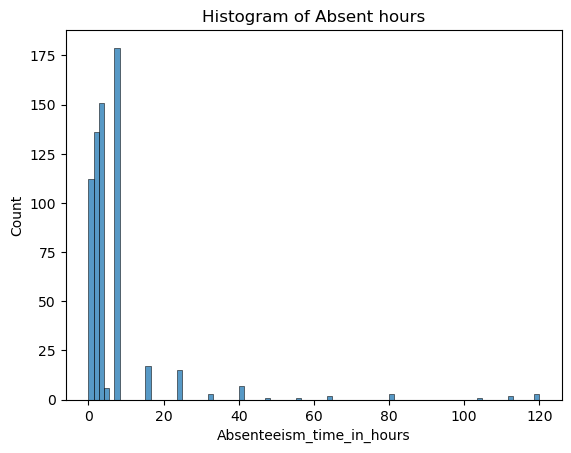

In [1327]:
sns.histplot(data=df, x='Absenteeism_time_in_hours');
plt.title("Histogram of Absent hours");

In [1328]:
median_hrs = df['Absenteeism_time_in_hours'].median()
print(f"median hours {median_hrs}")

median hours 3.0


#### 75% of them taken 8 hours. Median is 3 hours. Lets use absent or not as target feature. For this we can define hours taken above median as absent. Otherwise not absent.

In [1332]:

df['absent'] = np.where(df["Absenteeism_time_in_hours"] > median_hrs, 1, 0)

# lets get dataset of only absent ones
df_absent = df.query('absent==1')

# For the pupose of displaying graph, lets convert absent column to Yes/No
df2= df.copy()
df2['absent'] = df2['absent'].map({1: 'Yes', 0: 'No'})

### Feature : ID 

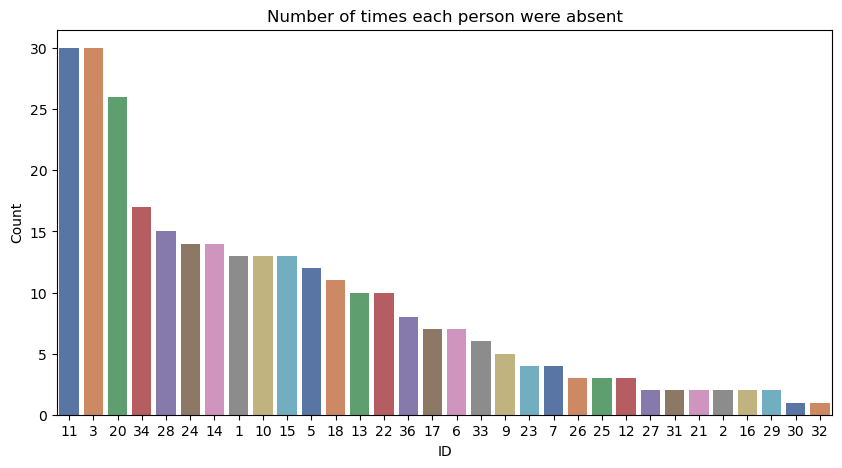

In [1335]:
count_plot(df_absent, 'ID', "Number of times each person were absent", w= 10)

In this bar chart, we are looking at the counts of all employees absences. We can see that the employee with ID 3, 11 and 20 have the most absences, with an absence count arround 30 times. We also see that the employee with ID 32 has the least amount of absences, with an absence count close to 0. Most of the employees have taken absennce 5 to 15 times.

The values of ID do not have a effect in emlpoyee absence. So column ID needs to be removed.


### Feature : Month_of_absence

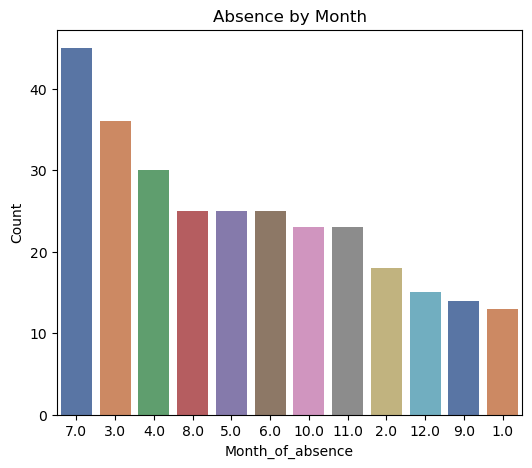

In [1339]:

count_plot(df_absent, 'Month_of_absence', "Absence by Month")

In this bar chart, we see that most employees are absent from work during the month of July with more than 50 recorded absences. The least amount of absences occur in January with less than 15 absences. Months May, June, August, October and November has almost same number of absences of 25 times. There seems to be no significance in the distribution of absences across the months. 


### Feature : Seasons

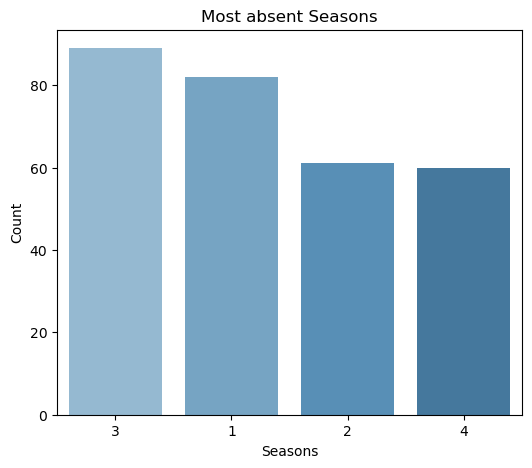

In [1343]:

count_plot(df_absent, 'Seasons', "Most absent Seasons", pallet="Blues_d")

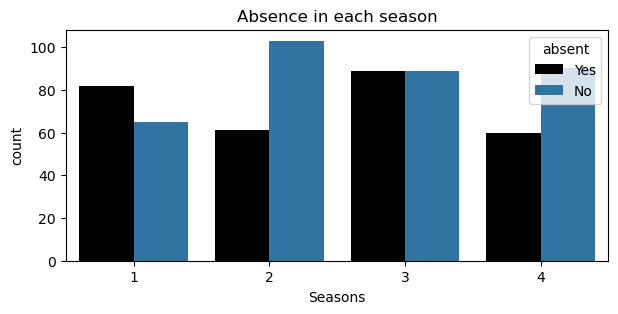

In [1345]:
palette ={'Yes': "k", 'No': "C10" }
plt.figure(figsize=(7,3))
sns.countplot(data=df2, hue='absent', x='Seasons', palette=palette);
plt.title("Absence in each season");

The 4 seasons are 1-Spring, 2-Summer, 3-Fall, 4-Winter. Most people were absent in fall and spring. In fall, there are eqaual number of people not absent as well. Lowest absence is in summer.

### Feature : Day_of_the_week

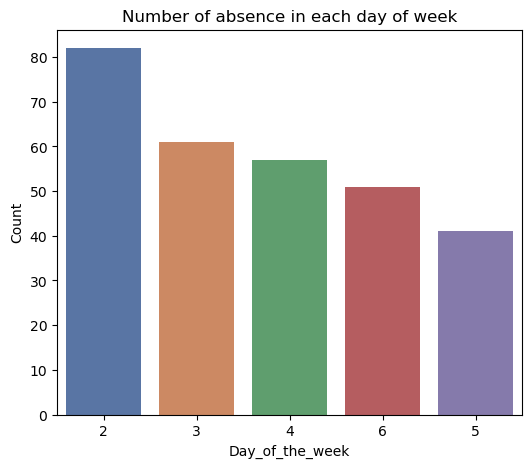

In [1349]:
count_plot(df_absent, 'Day_of_the_week', "Number of absence in each day of week")

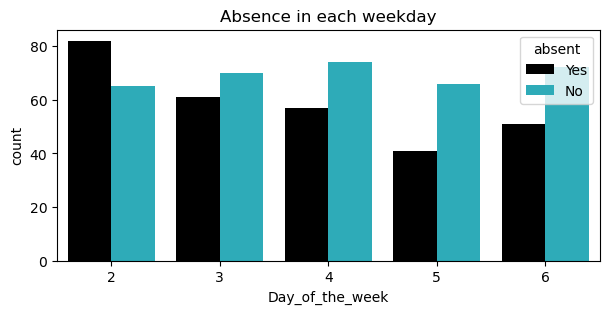

In [1350]:
palette ={'Yes': "k", 'No': "C9" }
plt.figure(figsize=(7,3))
sns.countplot(data=df2, hue='absent', x='Day_of_the_week', palette=palette);
plt.title("Absence in each weekday");

The day of weeks are 1-Sunday, 2-Monday, 3-Tuesday, 4-Wednesday, 5-Thursday, 6-Friday, 7-Saturday. Most number of absence is noted on Monday and least on Thursday. There seems to have a relation with day of week on absence.

### Feature : Age

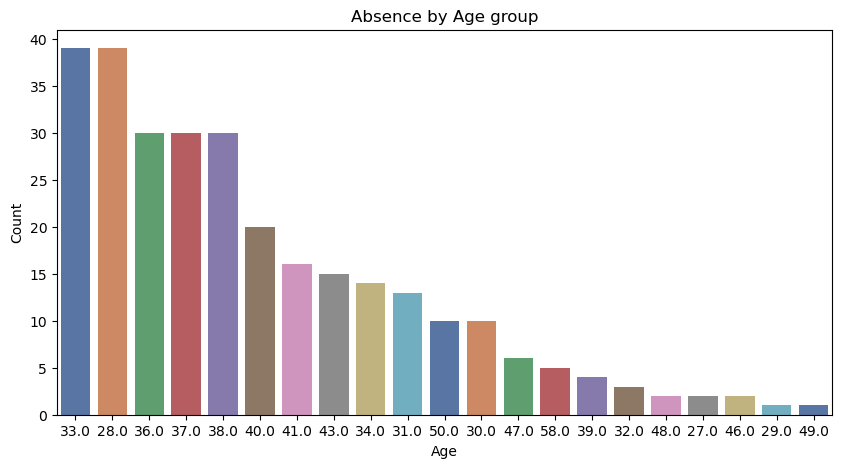

In [1359]:
count_plot(df_absent, 'Age', 'Absence by Age group', w=10)

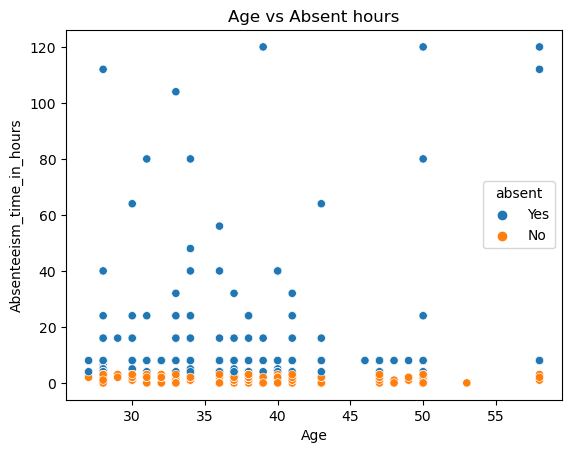

In [1360]:
sns.scatterplot(data=df2, x='Age', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Age vs Absent hours");

The absence happened in all age groups. Within absent people, age 30 and 28 have highest absence. The younger age group were more absent than old age group

### Feature : Social_drinker

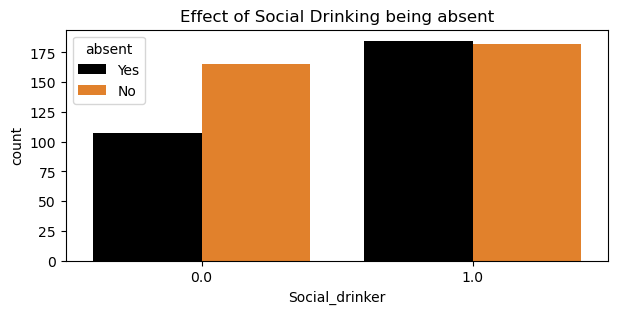

In [1363]:

palette ={'Yes': "k", 'No': "C1" }
plt.figure(figsize=(7,3))
sns.countplot(data=df2, hue='absent', x='Social_drinker', palette=palette);
plt.title("Effect of Social Drinking being absent");

In the bar chart, groups are 0.0-Not Social Drinker, 1.0-Social Driker. There is more absense in Social Drinking group. Social drinking has some effect on being absent

### Feature : Social_smoker

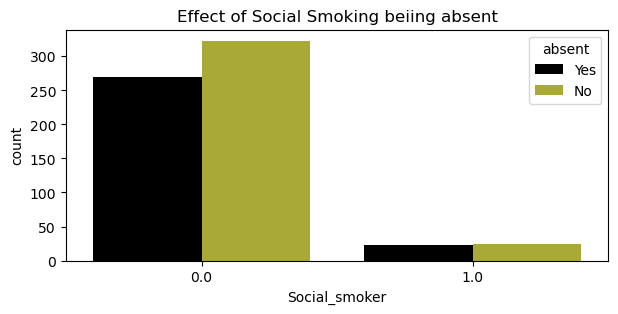

In [1367]:
palette ={'Yes': "k", 'No': "C18" }
plt.figure(figsize=(7,3))
sns.countplot(data=df2, hue='absent', x='Social_smoker', palette=palette);
plt.title("Effect of Social Smoking beiing absent");

In the bar chart the groups are 0.0-Not a Social Smoker, 1.0-Social Smoker. The absence is more among non-smocking group, which make sence as there is less smoking people at workplace.

### Feature : Education

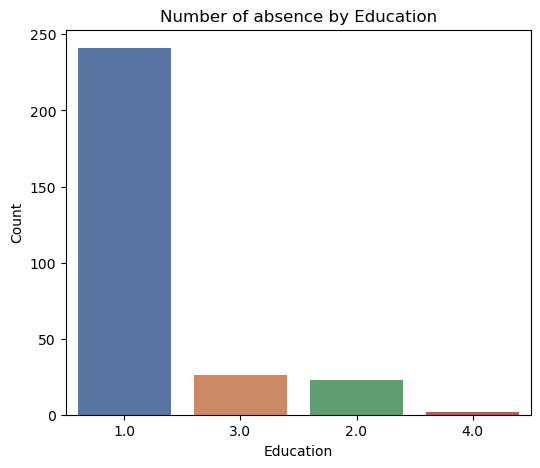

In [1372]:
count_plot(df_absent, 'Education', "Number of absence by Education")

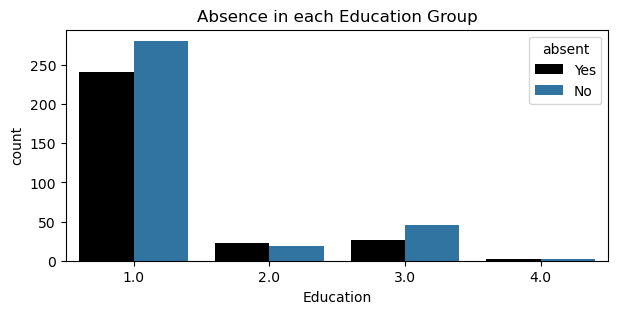

In [1373]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k", 'No': "C10" }
sns.countplot(data=df2,  x='Education', hue='absent', palette=palette);
plt.title("Absence in each Education Group");

The education groups are  1 High school, 2 Graduate, 3 Postgraduate, 4 Masters. Highest absence can be seen in group with highschool education. Lowest absence found in people with Masters degree. Educated people seems to be less absent at workplace.

### Feature : Children

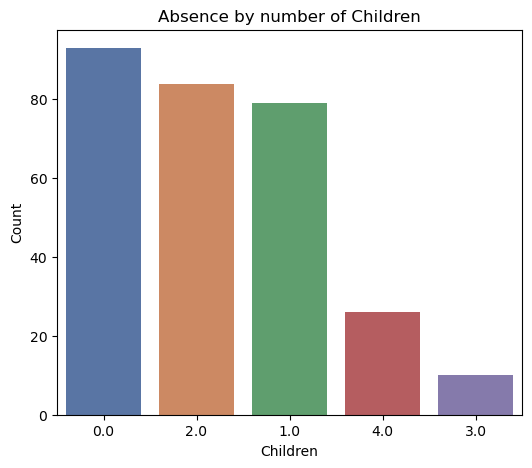

In [1378]:
count_plot(df_absent, 'Children', "Absence by number of Children")

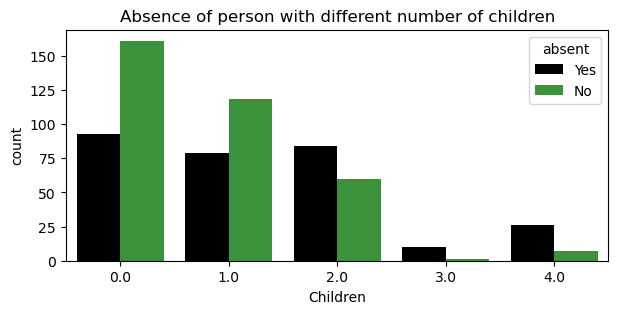

In [1380]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k", 'No': "C12" }
sns.countplot(data=df2,  x='Children', hue='absent', palette=palette);
plt.title("Absence of person with different number of children");

Within absentees, no children group have highest absence. People with more children seems to be less absent at workplace.

### Feature : Pet

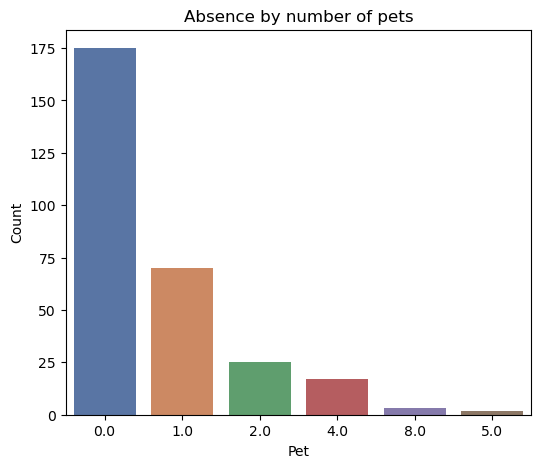

In [1385]:
count_plot(df_absent, 'Pet', "Absence by number of pets")

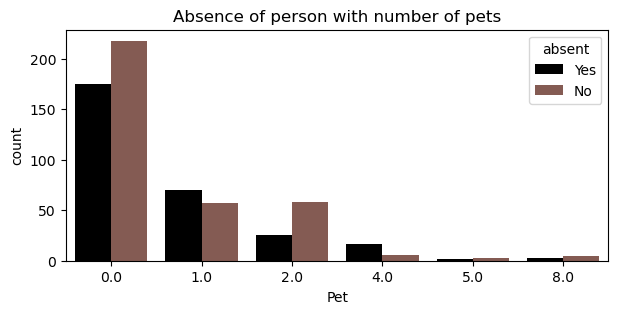

In [1386]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k", 'No': "C15" }
sns.countplot(data=df2,  x='Pet', hue='absent', palette=palette);
plt.title("Absence of person with number of pets");

Within absentees, no pets group have highest absence. People with more pets seems to be less absent at workplace.

### Feature : Body_mass_index

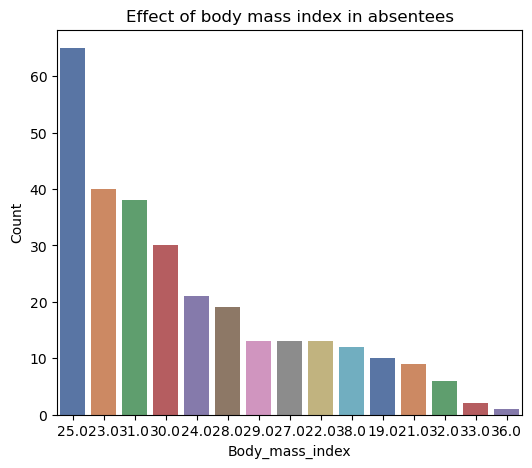

In [1391]:
count_plot(df_absent, 'Body_mass_index', 'Effect of body mass index in absentees')

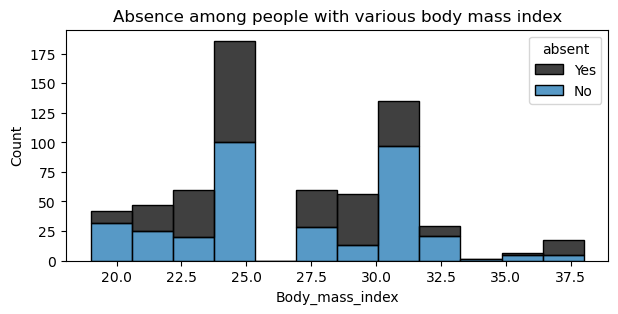

In [1392]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k", 'No': "C0" }
sns.histplot(data=df2,  x='Body_mass_index', hue='absent', multiple='stack', palette=palette);
plt.title("Absence among people with various body mass index");

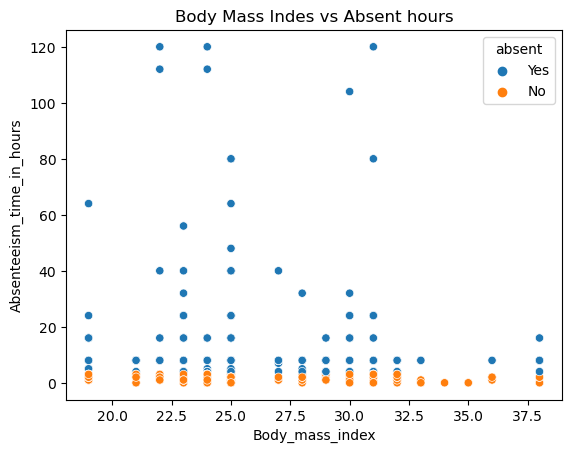

In [1393]:
sns.scatterplot(data=df2, x='Body_mass_index', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Body Mass Indes vs Absent hours");

Wihin absentees, people with body mass index 25 being more absent. The absenteeism is visible in all body mass indices.

### Feature : Weight

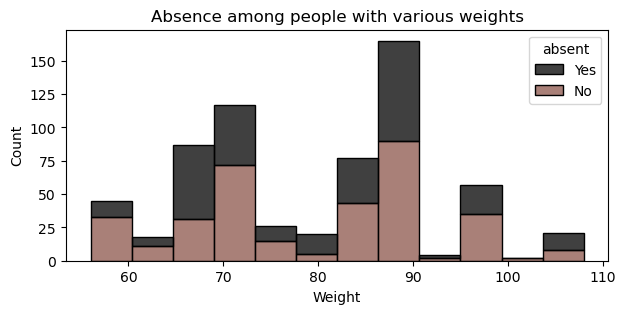

In [1398]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k", 'No': "C5" }
sns.histplot(data=df2,  x='Weight', hue='absent', multiple='stack',palette=palette);
plt.title("Absence among people with various weights");

People with weights 70 and 90kg were more absent than others. Being absent or not seems to be equaly distributed in all weight groups

### Feature : Height

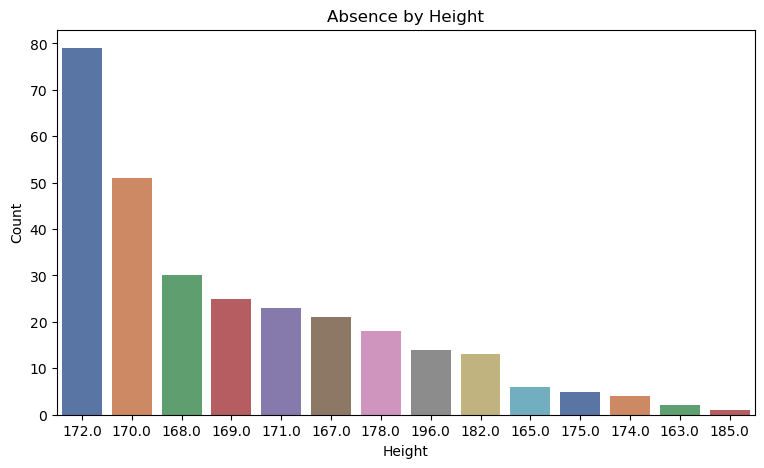

In [1402]:
count_plot(df_absent, 'Height', "Absence by Height",w=9)

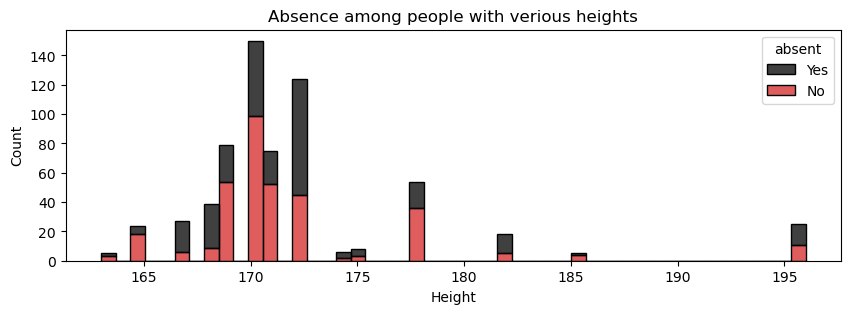

In [1403]:
plt.figure(figsize=(10,3))
palette ={'Yes': "k", 'No': "C3" }
sns.histplot(data=df2,  x='Height', hue='absent', multiple='stack', palette=palette);
plt.title("Absence among people with verious heights");

Within absentees, people having height 172 cm being more absent. Being absent or not is equally distributed in all heights. The height of a person should not affect being absent and this column needs to be dropped.

### Feature : Distance_from_Residence_to_Work

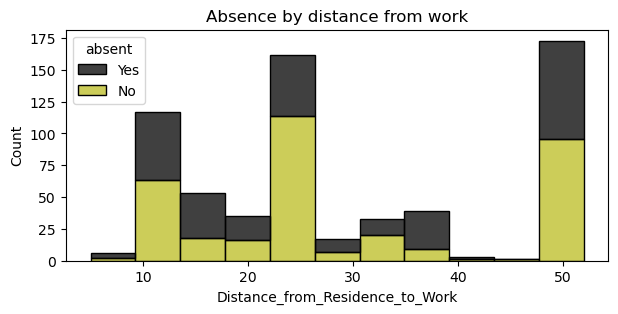

In [1408]:
plt.figure(figsize=(7,3))
palette ={'Yes': "k",'No': "C8"}
sns.histplot(data=df2,  x='Distance_from_Residence_to_Work', hue='absent', multiple='stack', palette=palette);
plt.title("Absence by distance from work");

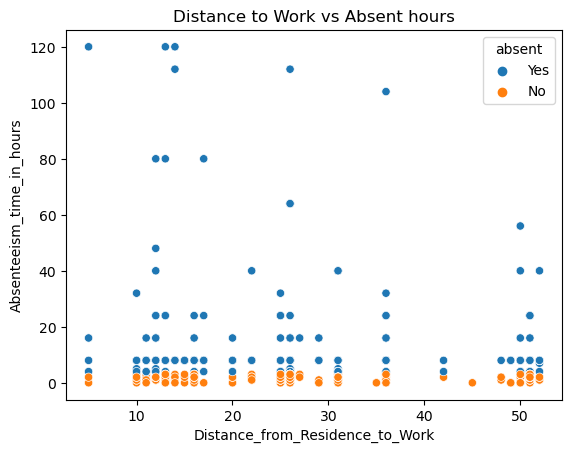

In [1409]:
sns.scatterplot(data=df2, x='Distance_from_Residence_to_Work', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Distance to Work vs Absent hours");

The distance work has less relationship with absenteeism. People are absent regardless of distance from work.

### Feature : Transportation_expense

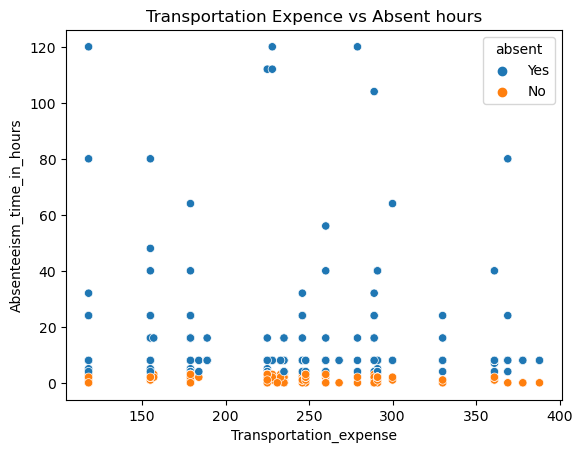

In [1413]:
sns.scatterplot(data=df2, x='Transportation_expense', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Transportation Expence vs Absent hours");

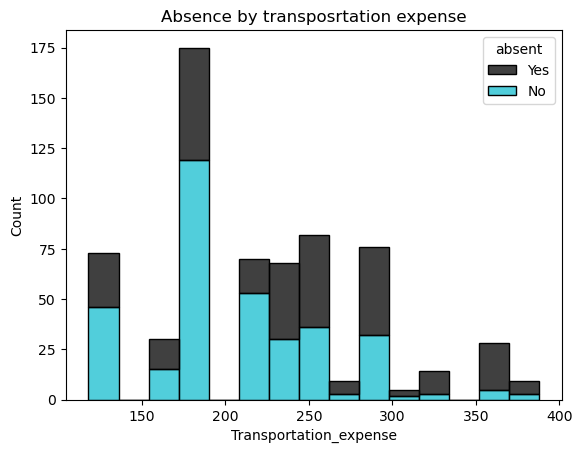

In [1414]:
palette ={'Yes': "k",'No': "C9"}
sns.histplot(data=df2, x='Transportation_expense',  hue='absent', multiple="stack", palette=palette);
plt.title("Absence by transposrtation expense");

Transportation expense seems to have less effect on being absent. But this feature is an importatnt factor compared to others.

### Feature : Work_load_Average_per_day

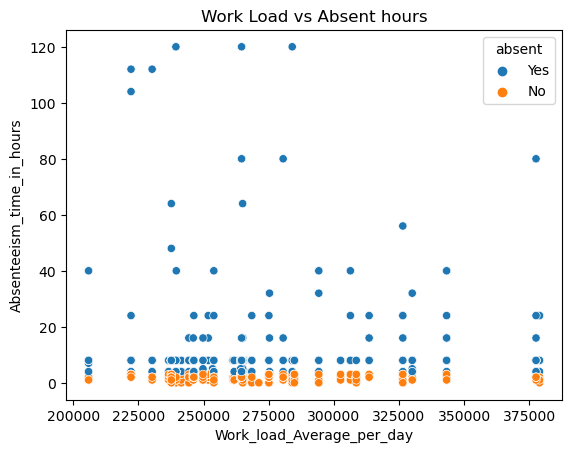

In [1419]:
sns.scatterplot(data=df2, x='Work_load_Average_per_day', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Work Load vs Absent hours");

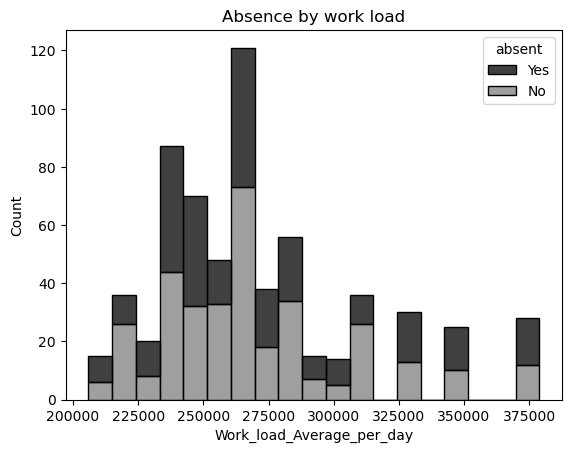

In [1420]:
palette ={'Yes': "k",'No': "C7"}
sns.histplot(data=df2, x='Work_load_Average_per_day',  hue='absent', multiple="stack", palette=palette);
plt.title("Absence by work load");

The workload looks equaly distributed among absentees and non absentees.

### Feature : Hit_target

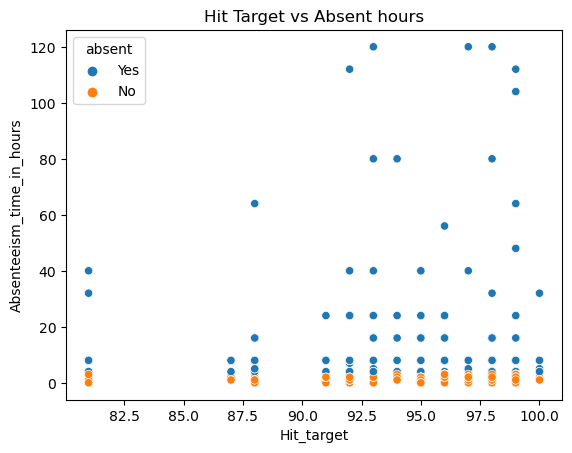

In [1425]:

sns.scatterplot(data=df2, x='Hit_target', y='Absenteeism_time_in_hours', hue='absent');
plt.title("Hit Target vs Absent hours");

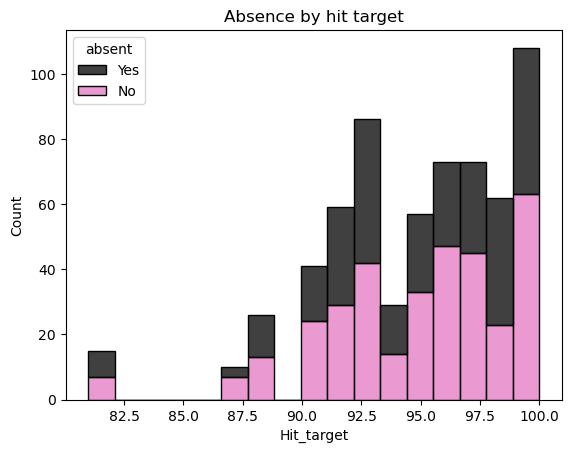

In [1426]:
palette ={'Yes': "k",'No': "C16"}
sns.histplot(data=df2, x='Hit_target', hue='absent', multiple='stack', palette=palette);
plt.title("Absence by hit target");

The hit target has no perticular relationship with absence. So this feature needs to be dropped.

### Feature : Reason for absence 

In [1431]:
The "Reason for absence" is International Code of Diseases (ICD). The codes are:

SyntaxError: invalid syntax (2112007978.py, line 1)

•	0: 'Unknown',
•	1: 'Certain infectious and parasitic diseases',
•	2: 'Neoplasms',
•	3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
•	4: 'Endocrine, nutritional and metabolic diseases',
•	5: 'Mental and behavioural disorders',
•	6: 'Diseases of the nervous system',
•	7: 'Diseases of the eye and adnexa',
•	8: 'Diseases of the ear and mastoid process',
•	9: 'Diseases of the circulatory system',
•	10: 'Diseases of the respiratory system',
•	11: 'Diseases of the digestive system',
•	12: 'Diseases of the skin and subcutaneous tissue',
•	13: 'Diseases of the musculoskeletal system and connective tissue',
•	14: 'Diseases of the genitourinary system',
•	15: 'Pregnancy, childbirth and the puerperium',
•	16: 'Certain conditions originating in the perinatal period',
•	17: 'Congenital malformations, deformations and chromosomal abnormalities',
•	18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
•	19: 'Injury, poisoning and certain other consequences of external causes',
•	20: 'External causes of morbidity and mortality',
•	21: 'Factors influencing health status and contact with health services',
•	22: 'Patient follow-up',
•	23: 'Medical consultation',
•	24: 'Blood donation',
•	25: 'Laboratory examination',
•	26: 'Unjustified absence',
•	27: 'Physiotherapy',
•	28: 'Dental consultation'


#### We are going to group these codes into 4 following groups:

#### 1 Health_Services_and_Patient_Management
#### 2 Infectious_and_Chronic_Diseases          
#### 3 Sensory_and_External_Diseases             
#### 4 Reproductive_and_Developmental_Health   

In [1446]:

category_groups = {
    0: 'Health_Services_and_Patient_Management',
    1: 'Infectious_and_Chronic_Diseases',
    2: 'Infectious_and_Chronic_Diseases',
    3: 'Infectious_and_Chronic_Diseases',
    4: 'Infectious_and_Chronic_Diseases',
    5: 'Infectious_and_Chronic_Diseases',
    6: 'Infectious_and_Chronic_Diseases',
    7: 'Sensory_and_External_Diseases',
    8: 'Sensory_and_External_Diseases',
    9: 'Infectious_and_Chronic_Diseases',
    10: 'Infectious_and_Chronic_Diseases',
    11: 'Infectious_and_Chronic_Diseases',
    12: 'Infectious_and_Chronic_Diseases',
    13: 'Infectious_and_Chronic_Diseases',
    14: 'Infectious_and_Chronic_Diseases',
    15: 'Reproductive_and_Developmental_Health',
    16: 'Reproductive_and_Developmental_Health',
    17: 'Infectious_and_Chronic_Diseases',
    18: 'Health_Services_and_Patient_Management',
    19: 'Sensory_and_External_Diseases',
    20: 'Sensory_and_External_Diseases',
    21: 'Health_Services_and_Patient_Management',
    22: 'Health_Services_and_Patient_Management',
    23: 'Health_Services_and_Patient_Management',
    24: 'Health_Services_and_Patient_Management',
    25: 'Health_Services_and_Patient_Management',
    26: 'Health_Services_and_Patient_Management',
    27: 'Health_Services_and_Patient_Management',
    28: 'Health_Services_and_Patient_Management',
}

df2["Reason"] = df2["Reason_for_absence"].map(category_groups)

In [1448]:
df2["Reason"].value_counts()

Reason
Health_Services_and_Patient_Management    428
Infectious_and_Chronic_Diseases           153
Sensory_and_External_Diseases              53
Reproductive_and_Developmental_Health       5
Name: count, dtype: int64

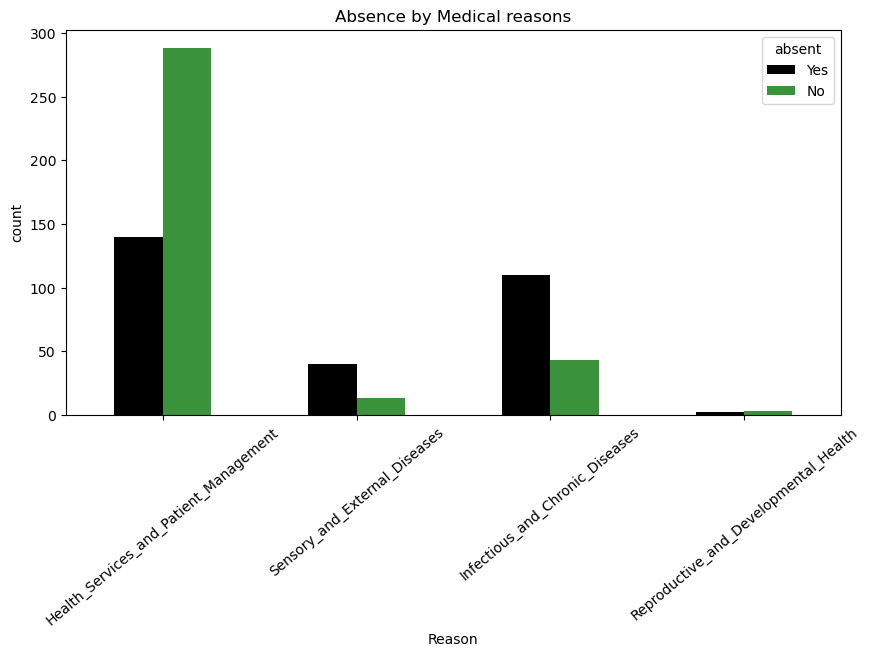

In [1450]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=40)
palette ={'Yes': "k", 'No': "C2" }
sns.countplot(data=df2,  x='Reason', hue='absent', width=0.5, palette=palette);
plt.title("Absence by Medical reasons");

The Health_Services_and_Patient_Management and Infectious_and_Chronic_Diseases are the major reasons for absence.

### Correlation Matrix

To build correlation matrix, lets drop following columns.

In [1458]:
df["Reason"] = df["Reason_for_absence"].map(category_groups)
data_1 = pd.get_dummies(df, columns=['Reason'])

In [1460]:
#
# Remove Reason_for_absence column
data_1.drop('Reason_for_absence', axis=1, inplace=True)

# Remove 'Absenteeism_time_in_hours'
data_1.drop('Absenteeism_time_in_hours', axis=1, inplace=True)

# Remove Height
data_1.drop('Height', axis=1, inplace=True)

# Remove Id
data_1.drop('ID', axis=1, inplace=True)

# Remove Hit_target
data_1.drop('Hit_target', axis=1, inplace=True)

# Remove 'Disciplinary_failure'
data_1.drop('Disciplinary_failure', axis=1, inplace=True)

# Remove 'Service_time'
data_1.drop('Service_time', axis=1, inplace=True)

In [1463]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [1465]:
data_1.Education.value_counts()

Education
0    522
1    117
Name: count, dtype: int64

In [1467]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)


After applying one-hot coding on Education and Reason, we have these columns


In [1472]:
data_2.dtypes

Month_of_absence                                 float64
Day_of_the_week                                    int64
Seasons                                            int64
Transportation_expense                           float64
Distance_from_Residence_to_Work                  float64
Age                                              float64
Work_load_Average_per_day                        float64
Children                                         float64
Social_drinker                                   float64
Social_smoker                                    float64
Pet                                              float64
Weight                                           float64
Body_mass_index                                  float64
absent                                             int32
Reason_Health_Services_and_Patient_Management       bool
Reason_Infectious_and_Chronic_Diseases              bool
Reason_Reproductive_and_Developmental_Health        bool
Reason_Sensory_and_External_Dis

In [1474]:
#
# Correltion matrix
corr_matrix = data_2.corr()

corr_matrix

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Age,Work_load_Average_per_day,Children,Social_drinker,Social_smoker,Pet,Weight,Body_mass_index,absent,Reason_Health_Services_and_Patient_Management,Reason_Infectious_and_Chronic_Diseases,Reason_Reproductive_and_Developmental_Health,Reason_Sensory_and_External_Diseases,Education_1
Month_of_absence,1.00,-0.04,0.38,0.13,-0.02,-0.00,-0.13,0.05,0.01,-0.04,0.05,0.01,0.04,0.05,0.03,0.00,0.00,-0.05,-0.06
Day_of_the_week,-0.04,1.00,0.04,0.00,0.09,0.01,0.02,0.09,0.02,0.03,-0.04,-0.13,-0.12,-0.11,0.09,-0.07,0.01,-0.04,0.06
Seasons,0.38,0.04,1.00,0.03,-0.07,-0.02,0.17,0.00,-0.08,-0.05,0.01,-0.03,-0.01,-0.07,-0.05,0.06,0.02,-0.02,-0.01
Transportation_expense,0.13,0.00,0.03,1.00,0.22,-0.22,0.02,0.37,0.10,0.04,0.37,-0.20,-0.13,0.24,-0.04,0.01,0.01,0.05,-0.02
Distance_from_Residence_to_Work,-0.02,0.09,-0.07,0.22,1.00,-0.14,-0.07,0.01,0.45,-0.10,0.18,-0.02,0.14,-0.02,0.12,-0.11,-0.01,-0.03,-0.26
Age,-0.00,0.01,-0.02,-0.22,-0.14,1.00,-0.04,0.07,0.21,0.13,-0.22,0.41,0.46,-0.04,0.01,0.04,0.02,-0.09,-0.26
Work_load_Average_per_day,-0.13,0.02,0.17,0.02,-0.07,-0.04,1.00,0.04,-0.02,0.03,0.02,-0.02,-0.07,0.05,-0.16,0.17,-0.05,0.02,-0.06
Children,0.05,0.09,0.00,0.37,0.01,0.07,0.04,1.00,0.18,0.17,0.12,-0.12,-0.13,0.25,-0.03,-0.05,0.08,0.09,-0.18
Social_drinker,0.01,0.02,-0.08,0.10,0.45,0.21,-0.02,0.18,1.00,-0.11,-0.13,0.40,0.34,0.11,0.06,-0.07,-0.03,0.02,-0.46
Social_smoker,-0.04,0.03,-0.05,0.04,-0.10,0.13,0.03,0.17,-0.11,1.00,0.09,-0.21,-0.20,0.02,-0.06,-0.03,0.18,0.09,0.15


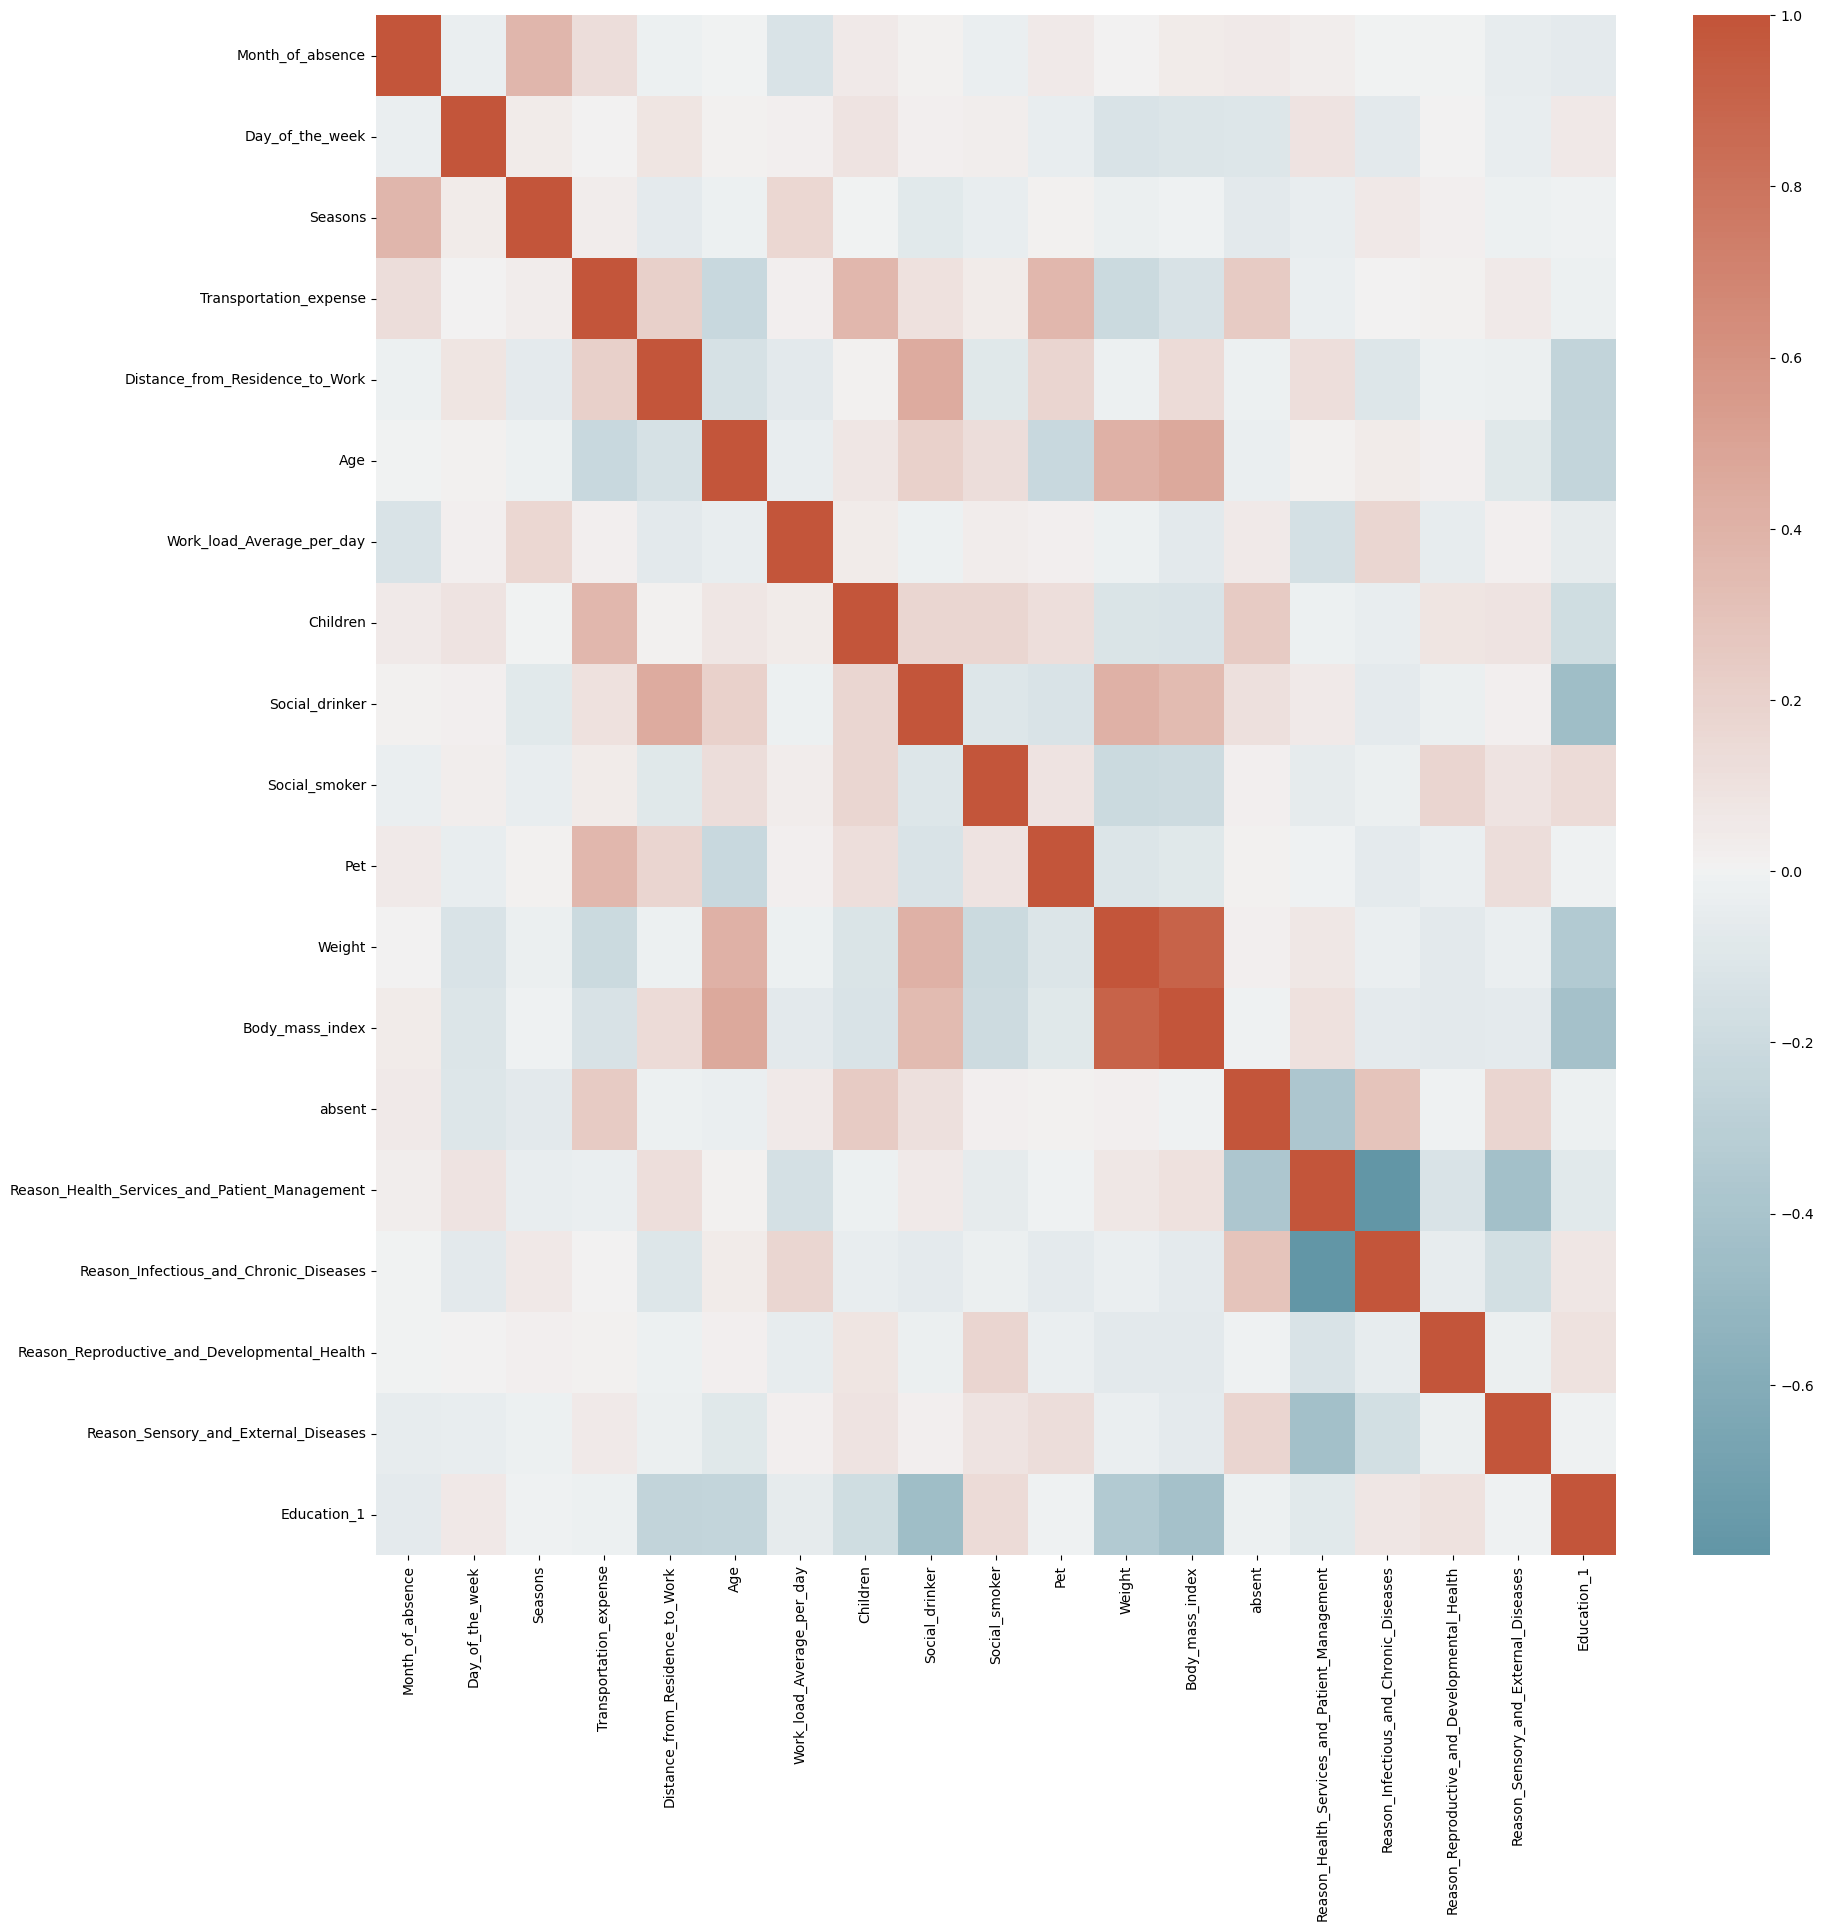

In [1476]:
plt.figure(figsize=(20, 20))
# Create a diverging colormap centered at zero
cmap = sns.diverging_palette(220, 20, as_cmap=True)
heat_map_pic = sns.heatmap(corr_matrix, cmap=cmap, center=0, annot=False)
fig = heat_map_pic.get_figure()
fig.savefig("heat_map.png")

The heat map shows following relationships among features. First let us analyse relationship with target feature 'absent'.
The 'absent' have positive effect with 'Transportation Expense', number of children, medical reason 'Infectious_and_Chronic_Diseases' and Sensory_and_External_Diseases.
The 'absent' have negative effect with medical reason 'Health_Services_and_Patient_Management'.
The correlation matrix also shows body related relationships between weight and age, weight and body mass index, weight and height, body mass index and age.
The month of absence and seasons have a relationship.

Overall, heat map does not show any strong relation for being absent.


In [1479]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [1481]:
X = data_2.drop('absent', axis=1)
y = data_2['absent']

In [1483]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (639, 18)
y shape: (639,)


In [1485]:
#
# Prepare trining and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1487]:

#
#  Scale using Statndared Scaler
#
pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [1489]:
#
# 
from sklearn.linear_model import LogisticRegression
#
print("\n LOGISTIC REGRESSION")
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)


 LOGISTIC REGRESSION


LogisticRegression(penalty='l1', solver='liblinear')

In [1491]:
#Predictions
y_test_pred = lr_clf.predict(X_test)
y_train_pred = lr_clf.predict(X_train)

In [1493]:
print(f" Accuracy Score:{accuracy_score(y_train, y_train_pred):.4f}")

 Accuracy Score:0.7271


In [1495]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)

print(f"Scores: {scores}")
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Scores: [0.73333333 0.57777778 0.62222222 0.73333333 0.73333333 0.75555556
 0.64444444 0.79545455 0.77272727 0.75      ]
Cross-Validation score mean: 71.18% (+/-6.78)


In [1497]:
def coefficients(model):
    feature_name = X.columns
    summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
    summary_table["Coefficients"] = np.transpose(model.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', model.intercept_[0]]
    summary_table.sort_index(inplace=True)
    summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
    summary_table.sort_values(by="Odds_ratio", ascending=False, inplace=True)
    return summary_table
coefficients(lr_clf)

,Features_name,Coefficients,Odds_ratio
8,Children,0.60,1.83
4,Transportation_expense,0.44,1.55
1,Month_of_absence,0.22,1.25
12,Weight,0.21,1.23
9,Social_drinker,0.20,1.22
7,Work_load_Average_per_day,0.12,1.13
17,Reason_Sensory_and_External_Diseases,0.07,1.08
18,Education_1,0.06,1.06
13,Body_mass_index,0.00,1.00
5,Distance_from_Residence_to_Work,0.00,1.00
